In [9]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90, high = 90, size=1500)

lngs = np.random.uniform(low=-90, high = 90, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the coordinates to a list

coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, add it to the cities list
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

651

In [10]:
#starting URL for weather map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters

record_count = 1

set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i%50 == 0 and i>= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint url with each city
    
    city_url = url+"&q="+city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an api request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        
        city_data.append({"City":city.title(),
                         "Lat": city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skiping...")
        
        pass
    
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | salinopolis
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | marcona
City not found. Skiping...
Processing Record 6 of Set 1 | kushchevskaya
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | maniitsoq
Processing Record 9 of Set 1 | taolanaro
City not found. Skiping...
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | puerto quijarro
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | caxias
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | axim
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | ifanadian

Processing Record 39 of Set 4 | sao sebastiao
Processing Record 40 of Set 4 | jizan
Processing Record 41 of Set 4 | severnoye
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | daund
Processing Record 44 of Set 4 | lubumbashi
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | malwan
City not found. Skiping...
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | salmas
Processing Record 1 of Set 5 | haverfordwest
Processing Record 2 of Set 5 | kars
Processing Record 3 of Set 5 | soverato
Processing Record 4 of Set 5 | sakakah
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | shakhrinau
City not found. Skiping...
Processing Record 7 of Set 5 | mana
Processing Record 8 of Set 5 | paramonga
Processing Record 9 of Set 5 | bubaque
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | rasskazovo
Processing Record 

Processing Record 29 of Set 8 | ganganagar
Processing Record 30 of Set 8 | collierville
Processing Record 31 of Set 8 | junin
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | campbellsville
Processing Record 34 of Set 8 | barcelos
Processing Record 35 of Set 8 | guajara-mirim
City not found. Skiping...
Processing Record 36 of Set 8 | yurginskoye
Processing Record 37 of Set 8 | high rock
Processing Record 38 of Set 8 | viligili
City not found. Skiping...
Processing Record 39 of Set 8 | turukhansk
Processing Record 40 of Set 8 | laki
Processing Record 41 of Set 8 | riyadh
Processing Record 42 of Set 8 | kaoma
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | hyderabad
Processing Record 46 of Set 8 | lodja
Processing Record 47 of Set 8 | eskil
Processing Record 48 of Set 8 | binga
Processing Record 49 of Set 8 | porto velho
Processing Record 50 of Set 8 | mikhaylovka
Processing Record 1 of Set 9 | 

Processing Record 14 of Set 12 | george town
Processing Record 15 of Set 12 | muros
Processing Record 16 of Set 12 | kozhva
Processing Record 17 of Set 12 | mortka
Processing Record 18 of Set 12 | arya
Processing Record 19 of Set 12 | ostersund
Processing Record 20 of Set 12 | stratford
Processing Record 21 of Set 12 | kibondo
Processing Record 22 of Set 12 | oshnaviyeh
Processing Record 23 of Set 12 | omboue
Processing Record 24 of Set 12 | dogondoutchi
Processing Record 25 of Set 12 | brokopondo
Processing Record 26 of Set 12 | gollere
City not found. Skiping...
Processing Record 27 of Set 12 | kosovska mitrovica
Processing Record 28 of Set 12 | kirkwall
Processing Record 29 of Set 12 | burlington
Processing Record 30 of Set 12 | alice town
Processing Record 31 of Set 12 | surt
Processing Record 32 of Set 12 | mitu
Processing Record 33 of Set 12 | plouzane
Processing Record 34 of Set 12 | bridgetown
Processing Record 35 of Set 12 | ninotsminda
Processing Record 36 of Set 12 | rindal


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2022-05-04 15:52:10,-33.9180,25.5701,70.09,83,0,4.61
1,Salinopolis,BR,2022-05-04 15:52:10,-0.6136,-47.3561,81.00,80,68,4.36
2,East London,ZA,2022-05-04 15:52:11,-33.0153,27.9116,70.74,83,0,4.61
3,Ushuaia,AR,2022-05-04 15:52:11,-54.8000,-68.3000,44.22,65,40,20.71
4,Kushchevskaya,RU,2022-05-04 15:52:11,46.5564,39.6386,57.65,78,100,4.14
5,Praia Da Vitoria,PT,2022-05-04 15:52:12,38.7333,-27.0667,67.75,88,75,13.35
6,Maniitsoq,GL,2022-05-04 15:52:12,65.4167,-52.9000,21.22,74,89,3.15
7,Vestmannaeyjar,IS,2022-05-04 15:52:12,63.4427,-20.2734,43.79,61,0,18.41
8,Puerto Quijarro,BO,2022-05-04 15:52:13,-17.7833,-57.7667,79.90,24,24,4.18
9,Jamestown,US,2022-05-04 15:52:13,42.0970,-79.2353,51.03,96,100,5.99


In [16]:
# Create the output file (csv)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [17]:
# Extract the relevant fields from the DF for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

<IPython.core.display.Javascript object>


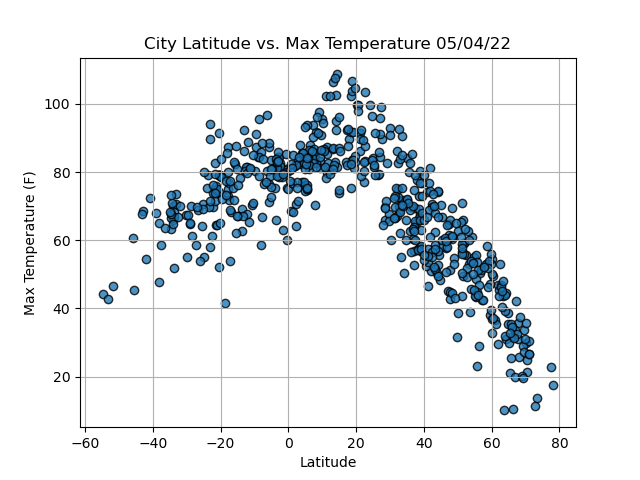

In [22]:
%matplotlib notebook

# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
            alpha= 0.8, label ="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

<IPython.core.display.Javascript object>


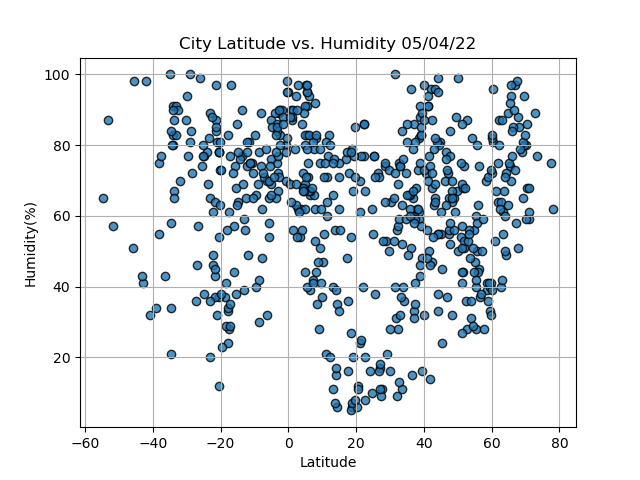

In [23]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
            alpha= 0.8, label ="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))

plt.ylabel("Humidity(%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

<IPython.core.display.Javascript object>


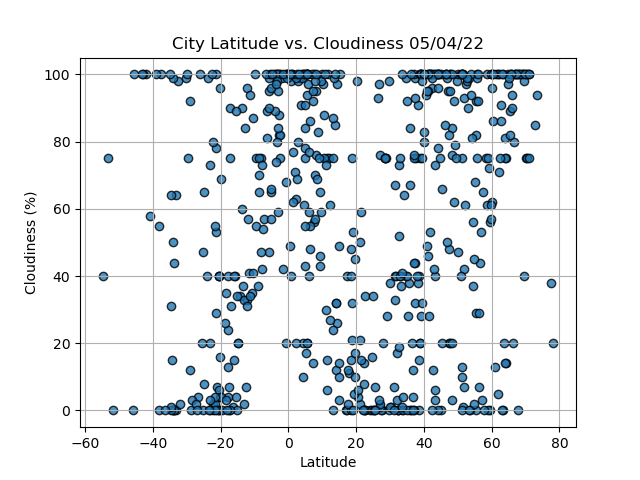

In [24]:
# Build the scatter plot for latitude vs. Cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
            alpha= 0.8, label ="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

<IPython.core.display.Javascript object>


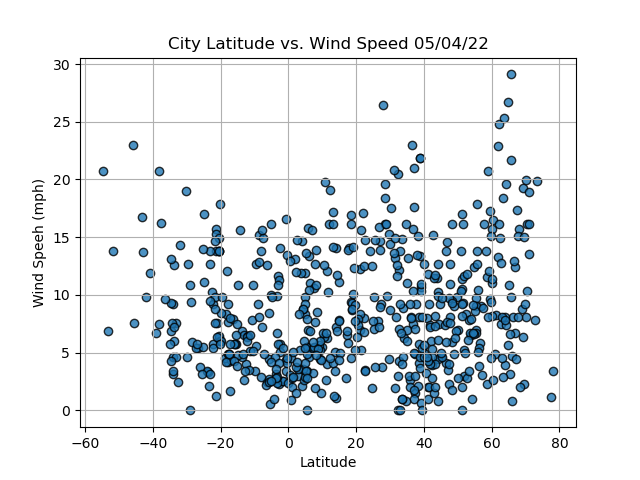

In [25]:
# Build the scatter plot for latitude vs. Wind Speed

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
            alpha= 0.8, label ="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))

plt.ylabel("Wind Speeh (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()